# Fashion Mnist

## Importing Libraries

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
number_of_classes = 10

## Reshape & Scale Data

In [5]:
def print_shape():
    print('x_train.shape:',x_train.shape)
    print('x_test.shape:',x_test.shape)
    print('y_train.shape:',y_train.shape)
    print('y_test.shape:',y_test.shape)

In [6]:
print_shape()

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [10]:
print_shape()

x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)
y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


## Creating CNN Model

In [11]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Dropout(rate = 0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(number_of_classes, activation='softmax'))

## Compile the Model

In [12]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

## Train the Model

In [13]:
model.fit(x = x_train,y = y_train,batch_size = 128, epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
469/469 [==============================] - 23s 49ms/step - loss: 0.5976 - accuracy: 0.7812 - val_loss: 0.4021 - val_accuracy: 0.8531
Epoch 2/4
469/469 [==============================] - 21s 46ms/step - loss: 0.3817 - accuracy: 0.8614 - val_loss: 0.3350 - val_accuracy: 0.8780
Epoch 3/4
469/469 [==============================] - 23s 49ms/step - loss: 0.3323 - accuracy: 0.8782 - val_loss: 0.3066 - val_accuracy: 0.8875
Epoch 4/4
469/469 [==============================] - 20s 43ms/step - loss: 0.3003 - accuracy: 0.8900 - val_loss: 0.2815 - val_accuracy: 0.8976


## Plot Losses

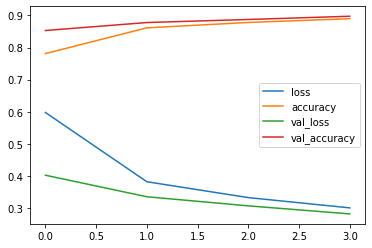

In [14]:
try:
    losses = pd.DataFrame(model.history.history)
    losses.plot()
except:
    print("Model's history is empty! Train the Model again!")

## Plot Loss and Accuracy Scores

In [15]:
scores = model.evaluate(x_test,y_test,verbose=1)
print(f'\nTest Loss: {round(scores[0],2)}\nTest Accuracy {round(scores[1],2)}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2815 - accuracy: 0.8976

Test Loss: 0.28
Test Accuracy 0.9


## Predict a Single Value

In [16]:
class_names=['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

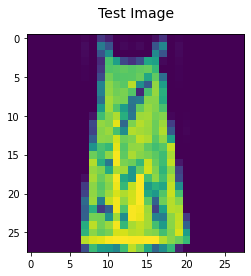

Calculating...
1/1 [==============================] - 0s 91ms/step

Prediction: Dress


In [17]:
test_number = 450
if (test_number>x_test.shape[0]-1) or (test_number < 0):
    print(f'Test number must be between 0-{x_test.shape[0]-1}')
else:
    test_image = x_test[test_number]
    
    # plot selected value
    plt.imshow(test_image.reshape(28,28))
    plt.title('Test Image',size = 14, y = 1.05)
    plt.show()

    # prediction
    test_data = test_image.reshape(1,28,28,1)
    print('Calculating...')
    prediction = model.predict(test_data,batch_size=1)
    prediction = np.argmax(prediction)
    print('\nPrediction:',class_names[prediction])

## Save Model

In [1]:
# try:
#     model.save('my_model.h5')  
#     print('Model Saved')
# except Exception as ex:
#     print(ex)